In [43]:
import csv
import cv2
import copy
import itertools
import matplotlib as plot

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

import os
from os import listdir

RANDOM_SEED = 42
modelversion = 4

In [44]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode= True ,
    max_num_hands= 1,
    min_detection_confidence=0.7,
)

# file = '/content/drive/MyDrive/asl_alphabet/test'
# image = cv2.flip(cv2.imread(file + '/B/B1.jpg'), 1)
# idx = 2

# results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



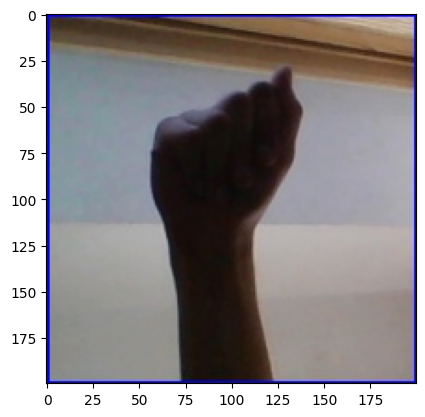

In [45]:
from PIL import Image
temp = Image.open('F:/hand-gesture-recognition-mediapipe/dataset/asl_alphabet_train/asl_alphabet_train/A/A1.jpg')

plot.pyplot.imshow(temp)
plot.pyplot.show()

In [49]:
def calc_landmark_list(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_point = []

    # Keypoint
    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)
        # landmark_z = landmark.z

        landmark_point.append([landmark_x, landmark_y])

    return landmark_point

def pre_process_landmark(landmark_list):
  temp_landmark_list = copy.deepcopy(landmark_list)

  # Convert to relative coordinates
  base_x, base_y = 0, 0
  for index, landmark_point in enumerate(temp_landmark_list):
      if index == 0:
          base_x, base_y = landmark_point[0], landmark_point[1]

      temp_landmark_list[index][0] = temp_landmark_list[index][0] - base_x
      temp_landmark_list[index][1] = temp_landmark_list[index][1] - base_y

  # Convert to a one-dimensional list
  temp_landmark_list = list(
      itertools.chain.from_iterable(temp_landmark_list))

  # Normalization
  max_value = max(list(map(abs, temp_landmark_list)))

  def normalize_(n):
      return n / max_value

  temp_landmark_list = list(map(normalize_, temp_landmark_list))

  return temp_landmark_list

def logging_csv(number, landmark_list):
  csv_path = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint.csv'
  with open(csv_path, 'a', newline="") as f:
    writer = csv.writer(f)
    writer.writerow([number, *landmark_list])


In [50]:
#Reading image files and classifying them
ltr2num = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9,
           'K':10, 'L':11, 'M':12, 'N':13, 'O':14, 'P':15, 'Q':16, 'R':17, 
           'S':18, 'T':19, 'U':20, 'V':21, 'W':22, 'X':23, 'Y':24, 'Z':25,
           'del':26, 'space':27}
num2ltr =  {value: key for key, value in ltr2num.items()}

file = 'F:/hand-gesture-recognition-mediapipe/dataset/asl_alphabet_train/asl_alphabet_train'
file2 = 'F:/HandGestureRecognition/hassan_dataset_copy'
for ltr, num in ltr2num.items():
  print(ltr + 'started')

  if ltr != 'del':
    folder_dir = file2 + '/' + ltr
    for images in os.listdir(folder_dir):
  
      # check if the image ends with png
      if (images.endswith(".jpeg")):
        img = cv2.flip(cv2.imread(folder_dir + '/' + images), 1)
        debug_image = copy.deepcopy(img)

        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True

        if results.multi_hand_landmarks is not None:
          for hand_landmarks, handedness in zip(results.multi_hand_landmarks,
                                                    results.multi_handedness):
          
            landmark_list = calc_landmark_list(debug_image, hand_landmarks)
            pre_processed_landmark_list = pre_process_landmark(landmark_list)
            logging_csv(num, pre_processed_landmark_list)
        


  for i in range(1, 3001):
    if i % 100 == 0:
      print(ltr + ':' + str(i) + 's started old')

    img = cv2.flip(cv2.imread(file + '/' + ltr + '/' + ltr + str(i) +'.jpg'), 1)
    debug_image = copy.deepcopy(img)

    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True

    if results.multi_hand_landmarks is not None:
      for hand_landmarks, handedness in zip(results.multi_hand_landmarks,
                                                  results.multi_handedness):
        
        landmark_list = calc_landmark_list(debug_image, hand_landmarks)
        pre_processed_landmark_list = pre_process_landmark(landmark_list)
        logging_csv(num, pre_processed_landmark_list)



  print(ltr + 'Done')
        
        


Astarted
A:100s started old
A:200s started old
A:300s started old
A:400s started old
A:500s started old
A:600s started old
A:700s started old
A:800s started old
A:900s started old
A:1000s started old
A:1100s started old
A:1200s started old
A:1300s started old
A:1400s started old
A:1500s started old
A:1600s started old
A:1700s started old
A:1800s started old
A:1900s started old
A:2000s started old
A:2100s started old
A:2200s started old
A:2300s started old
A:2400s started old
A:2500s started old
A:2600s started old
A:2700s started old
A:2800s started old
A:2900s started old
A:3000s started old
ADone
Bstarted
B:100s started old
B:200s started old
B:300s started old
B:400s started old
B:500s started old
B:600s started old
B:700s started old
B:800s started old
B:900s started old
B:1000s started old
B:1100s started old
B:1200s started old
B:1300s started old
B:1400s started old
B:1500s started old
B:1600s started old
B:1700s started old
B:1800s started old
B:1900s started old
B:2000s starte

# Specify each path

In [51]:
dataset = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint.csv'
model_save_path = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint_classifier.hdf5'
tflite_save_path = 'F:/HandGestureRecognition/dataset/model'+ str(modelversion) +'/keypoint_classifier.tflite'

# Set number of classes

In [52]:
NUM_CLASSES = 28

# Dataset reading

In [53]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [54]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [57]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2752      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 28)                924       
                                                                 
Total params: 5,756
Trainable params: 5,756
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [59]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [60]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
340/350 [============================>.] - ETA: 0s - loss: 2.1612 - accuracy: 0.3316
Epoch 1: saving model to F:/HandGestureRecognition/dataset/model3\keypoint_classifier.hdf5
350/350 [==============================] - 2s 5ms/step - loss: 2.1405 - accuracy: 0.3366 - val_loss: 0.9313 - val_accuracy: 0.7973
Epoch 2/1000
350/350 [==============================] - ETA: 0s - loss: 1.1844 - accuracy: 0.5900
Epoch 2: saving model to F:/HandGestureRecognition/dataset/model3\keypoint_classifier.hdf5
350/350 [==============================] - 1s 4ms/step - loss: 1.1844 - accuracy: 0.5900 - val_loss: 0.6381 - val_accuracy: 0.8379
Epoch 3/1000
340/350 [============================>.] - ETA: 0s - loss: 1.0130 - accuracy: 0.6496
Epoch 3: saving model to F:/HandGestureRecognition/dataset/model3\keypoint_classifier.hdf5
350/350 [==============================] - 1s 4ms/step - loss: 1.0110 - accuracy: 0.6504 - val_loss: 0.5329 - val_accuracy: 0.8847
Epoch 4/1000
340/350 [==================

In [61]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

117/117 [==============================] - 0s 3ms/step - loss: 0.2939 - accuracy: 0.8915


In [62]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [63]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 43ms/step
[1.66087261e-06 3.16210347e-03 1.21402127e-06 8.15153646e-04
 3.42901505e-04 4.38141833e-05 3.70840917e-06 4.72815882e-05
 1.75742956e-04 1.11389709e-05 1.85454625e-03 4.55237341e-06
 3.12344455e-05 9.39773599e-06 2.10337475e-05 1.58268989e-07
 1.05153724e-07 3.43127102e-01 6.51203445e-05 3.70758539e-06
 6.23861730e-01 2.14642864e-02 2.70081754e-03 2.16771895e-03
 7.45590167e-09 8.12475701e-05 3.55055676e-07 2.13189719e-06]
20


# Confusion matrix

467/467 [==============================] - 1s 1ms/step


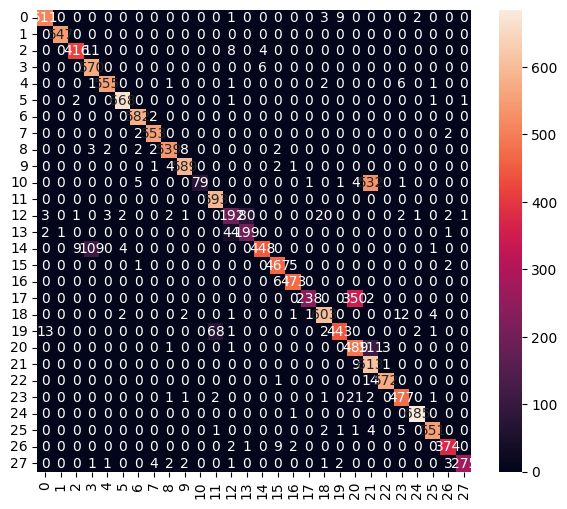

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       526
           1       1.00      1.00      1.00       547
           2       0.97      0.95      0.96       439
           3       0.82      0.99      0.90       576
           4       0.99      0.98      0.98       567
           5       0.99      0.99      0.99       673
           6       0.98      1.00      0.99       584
           7       0.98      0.99      0.99       557
           8       0.98      0.97      0.97       558
           9       0.98      0.99      0.98       597
          10       1.00      0.13      0.23       623
          11       0.89      1.00      0.94       593
          12       0.76      0.62      0.68       310
          13       0.71      0.81      0.76       247
          14       0.98      0.78      0.87       571
          15       0.96      0.98      0.97       475
          16       0.98      0.99      0.98       479
     

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [65]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [66]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmp_0yfex9m\assets


INFO:tensorflow:Assets written to: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmp_0yfex9m\assets


11064

# Inference test

In [67]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [68]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [69]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [70]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [71]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.3673765e-06 3.2360964e-03 1.1802023e-06 7.7553728e-04 3.0255000e-04
 4.0967152e-05 3.0358747e-06 4.0950163e-05 1.4890470e-04 9.8316568e-06
 1.8052310e-03 4.1264034e-06 2.9298577e-05 8.6793934e-06 1.8884912e-05
 1.3002897e-07 8.6340286e-08 3.3613336e-01 5.7475208e-05 3.4138234e-06
 6.3161504e-01 2.1023415e-02 2.6213003e-03 2.0388060e-03 5.6853930e-09
 7.8166646e-05 3.1725719e-07 1.9522222e-06]
20
